In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
csv = pd.read_csv("CIFAR+eta=1.csv")
csv

,Name,mode,scale,label,validity,fid,sfid,is,precision,recall
0,guide_mode=classifier+scale=0.1+label=8,classifier,0.1,8,0.3652,91.932738,114.626943,7.021482,0.350586,0.570
1,guide_mode=classifier+scale=0.1+label=6,classifier,0.1,6,0.2471,90.925637,137.488113,6.851516,0.373047,0.574
2,guide_mode=dynamic-two-0.5*a*(1-a)+scale=20+la...,dynamic-two-0.5*a*(1-a),20.0,1,0.8208,39.476015,122.032979,3.341644,0.606445,0.517
3,guide_mode=dynamic-two-0.1*a*(1-a)+scale=20+la...,dynamic-two-0.1*a*(1-a),20.0,1,0.8135,40.359251,120.499850,3.390682,0.585938,0.474
4,guide_mode=dynamic-fonly+scale=20+label=1,dynamic-fonly,20.0,1,0.8174,41.016895,120.525200,3.403000,0.583984,0.443
...,...,...,...,...,...,...,...,...,...,...
220,guide_mode=dynamic-nog-0.5+scale=2+label=6,dynamic-nog-0.5,2.0,6,0.3247,134.378238,160.976329,5.211106,0.347656,0.294
221,guide_mode=dynamic-one-0.1*(1-a)+scale=100+lab...,dynamic-one-0.1*(1-a),100.0,6,0.5205,136.734943,151.017541,5.259345,0.403809,0.212
222,guide_mode=manifold+scale=20+label=8,manifold,20.0,8,0.7637,70.601545,115.153924,4.599549,0.482422,0.403
223,guide_mode=manifold+scale=50+label=8,manifold,50.0,8,0.6855,88.271165,117.174799,4.982554,0.427246,0.369


In [5]:
avg = csv.groupby(['mode', 'scale']).mean(['validity', 'fid', 'sfid', 'is', 'precision', 'recall']).reset_index()
avg

,mode,scale,label,validity,fid,sfid,is,precision,recall
0,classifier,0.10,5.0,0.288900,91.391462,126.834146,6.831919,0.329753,0.590333
1,classifier,0.25,5.0,0.589367,53.712146,119.912705,4.824308,0.491374,0.526333
2,classifier,0.50,5.0,0.790700,39.151420,123.533796,3.603296,0.630697,0.477667
3,classifier,1.00,5.0,0.902500,39.480449,134.853183,2.883460,0.733236,0.383667
4,classifier,2.00,5.0,0.951333,48.992927,153.782200,2.580580,0.774740,0.297000
...,...,...,...,...,...,...,...,...,...
70,manifold,1.00,5.0,0.633100,56.384842,119.824705,4.674417,0.476074,0.557333
71,manifold,2.00,5.0,0.742033,48.367653,119.447205,4.212489,0.539551,0.527667
72,manifold,5.00,5.0,0.796533,50.477113,121.722460,4.070835,0.564616,0.472333
73,manifold,20.00,5.0,0.713700,76.683105,128.485582,4.660506,0.486654,0.428667


<Axes: xlabel='fid', ylabel='validity'>

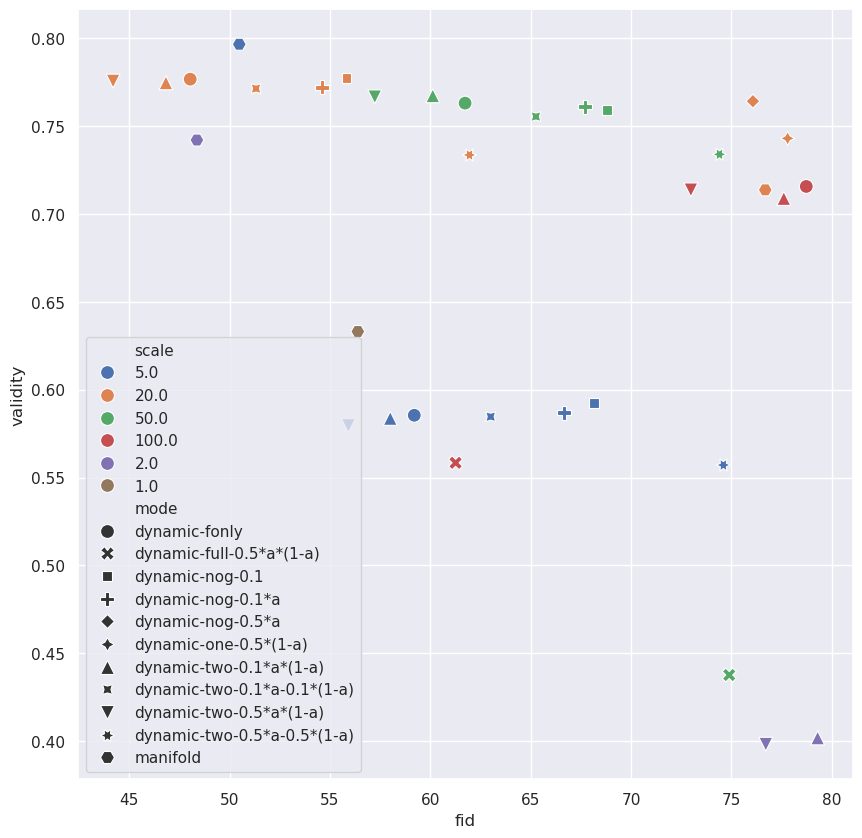

In [12]:
data = avg.loc[avg['mode'] != 'classifier']
data = data.loc[data['fid'] < 80]
data['scale'] = data['scale'].map(lambda x: str(x))
plt.figure(figsize=(10,10), dpi=100)
sns.scatterplot(data=data, x='fid', y='validity', hue='scale', style='mode', s=100)

In [16]:
csv.loc[csv['mode'].isin(['manifold', 'dynamic-fonly'])].loc[csv['label'] == 1].sort_values(by=['mode', 'scale'])

,Name,mode,scale,label,validity,fid,sfid,is,precision,recall
102,guide_mode=dynamic-fonly+scale=2+label=1,dynamic-fonly,2.0,1,0.3813,77.318172,124.520638,5.586083,0.329590,0.615
25,guide_mode=dynamic-fonly+scale=5+label=1,dynamic-fonly,5.0,1,0.5913,51.794021,118.781807,4.395249,0.461426,0.558
4,guide_mode=dynamic-fonly+scale=20+label=1,dynamic-fonly,20.0,1,0.8174,41.016895,120.525200,3.403000,0.583984,0.443
28,guide_mode=dynamic-fonly+scale=50+label=1,dynamic-fonly,50.0,1,0.8403,53.079123,126.083413,3.457582,0.559082,0.384
65,guide_mode=dynamic-fonly+scale=100+label=1,dynamic-fonly,100.0,1,0.8120,64.265418,126.881540,3.983398,0.479492,0.442
15,guide_mode=manifold+scale=1+label=1,manifold,1.0,1,0.6523,48.452983,118.477048,4.190792,0.482422,0.559
5,guide_mode=manifold+scale=2+label=1,manifold,2.0,1,0.7583,41.127577,117.742019,3.625943,0.551270,0.517
8,guide_mode=manifold+scale=5+label=1,manifold,5.0,1,0.8374,43.015129,120.601504,3.541133,0.593750,0.453
56,guide_mode=manifold+scale=20+label=1,manifold,20.0,1,0.8164,61.726525,127.401138,3.763835,0.516113,0.423
110,guide_mode=manifold+scale=50+label=1,manifold,50.0,1,0.7456,78.389110,125.010881,4.274128,0.431152,0.379
